In [ ]:
#### DESCRIPTION
# exploring the 2D dataset provided by Wang et al, 2018, Science

In [36]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import os

In [1]:
x = loadmat('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/mpfc_160/20180417_BZ5_control/goodPoints.mat')


In [6]:
counts = np.load('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/mpfc_160/20180417_BZ5_control/cell_barcode_count.npy')
# counts matrix is 1127 cells x 166 genes

In [20]:
genenames = pd.read_csv('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/mpfc_160/20180417_BZ5_control/cell_barcode_names.csv')

# genes correspond to the colnames in counts (165 genes)

In [29]:
labels = pd.read_csv('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/mpfc_160/20180417_BZ5_control/class_labels.csv')
# 1127 cell labels
# in https://www.starmapresources.com/data are not explicit that these correspond to then rows in counts matrix

In [70]:
# function from here: https://github.com/weallen/STARmap/blob/master/python/analysis.py
def load_data(data_dir, prefix="Cell"):
        #expr = pd.read_csv(os.path.join(data_dir, "data_table.csv"), index_col=0)
    expr = pd.read_csv(os.path.join(data_dir, "cell_barcode_count.csv"), header=None)
    gene_names = pd.read_csv(os.path.join(data_dir, "cell_barcode_names.csv"),header=None)
    rownames = ["%s_%05d"% (prefix,i) for i in range(expr.shape[0])]
    names = gene_names[2]
    names.name = "Gene"
    return pd.DataFrame(data=expr.values, columns=names, index=rownames)

# function from https://github.com/weallen/STARmap/blob/master/python/viz.py
def GetQHulls(labels):
    labels += 1
    Nlabels = labels.max()
    hulls = []
    coords = []
    num_cells = 0
    print('blah')
    for i in range(Nlabels):#enumerate(regionprops(labels)):    
        print(i,"/",Nlabels)
        curr_coords = np.argwhere(labels==i)
        # size threshold of > 100 pixels and < 100000
        if curr_coords.shape[0] < 100000 and curr_coords.shape[0] > 1000:
            num_cells += 1
            hulls.append(ConvexHull(curr_coords))
            coords.append(curr_coords)
    print("Used %d / %d" % (num_cells, Nlabels))
    return hulls, coords 

def plot_poly_cells_expression(nissl, hulls, expr, cmap, good_cells=None,width=2, height=9,figscale=10,alpha=1):
    figscale = 10
    plt.figure(figsize=(figscale*width/float(height),figscale))
    polys = [hull_to_polygon(h) for h in hulls]
    if good_cells is not None:
        polys = [p for i,p in enumerate(polys) if i in good_cells]
    p = PatchCollection(polys,alpha=alpha, cmap=cmap,linewidths=0)
    p.set_array(expr)
    p.set_clim(vmin=0, vmax=expr.max())        
    plt.gca().add_collection(p)
    plt.imshow(nissl.T, cmap=plt.cm.gray_r,alpha=0.15)
    plt.axis('off')
    
def hull_to_polygon(hull):    
    cent = np.mean(hull.points, 0)
    pts = []
    for pt in hull.points[hull.simplices]:
        pts.append(pt[0].tolist())
        pts.append(pt[1].tolist())
    pts.sort(key=lambda p: np.arctan2(p[1] - cent[1],
                                    p[0] - cent[0]))
    pts = pts[0::2]  # Deleting duplicates
    pts.insert(len(pts), pts[0])
    k =1.1
    poly = Polygon(k*(np.array(pts)- cent) + cent,edgecolor='k', linewidth=1)
    #poly.set_capstyle('round')
    return poly


In [53]:
from __future__ import print_function
from scipy.spatial import ConvexHull
from skimage.transform import downscale_local_mean
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from skimage.measure import regionprops
import numpy as np
import matplotlib.pyplot as plt

In [39]:
counts = load_data('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/mpfc_160/20180417_BZ5_control')

In [46]:
labs = np.load('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/mpfc_160/20180417_BZ5_control/labels.npz')["labels"]
# 2D image encoding the cell segmentation, where each cell is represented as a block of pixels with the same numeric ID. 



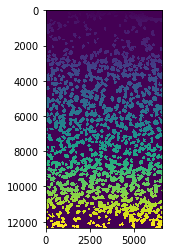

In [117]:
plt.imshow(labs)

In [110]:
labs[labs==30]

array([30, 30, 30, ..., 30, 30, 30], dtype=int32)

In [111]:
labs

array([[   1,    1,    1, ...,    1,    1,    1],
       [   1,    1,    1, ...,    1,    1,    1],
       [   1,    1,    1, ...,    1,    1,    1],
       ...,
       [1128, 1128, 1128, ...,    1,    1,    1],
       [1128, 1128, 1128, ...,    1,    1,    1],
       [1128, 1128, 1128, ...,    1,    1,    1]], dtype=int32)

In [61]:
qhulls,coords = GetQHulls(labs)

blah
0 / 1131
1 / 1131
2 / 1131
3 / 1131
4 / 1131
5 / 1131
6 / 1131
7 / 1131
8 / 1131
9 / 1131
10 / 1131
11 / 1131
12 / 1131
13 / 1131
14 / 1131
15 / 1131
16 / 1131
17 / 1131
18 / 1131
19 / 1131
20 / 1131
21 / 1131
22 / 1131
23 / 1131
24 / 1131
25 / 1131
26 / 1131
27 / 1131
28 / 1131
29 / 1131
30 / 1131
31 / 1131
32 / 1131
33 / 1131
34 / 1131
35 / 1131
36 / 1131
37 / 1131
38 / 1131
39 / 1131
40 / 1131
41 / 1131
42 / 1131
43 / 1131
44 / 1131
45 / 1131
46 / 1131
47 / 1131
48 / 1131
49 / 1131
50 / 1131
51 / 1131
52 / 1131
53 / 1131
54 / 1131
55 / 1131
56 / 1131
57 / 1131
58 / 1131
59 / 1131
60 / 1131
61 / 1131
62 / 1131
63 / 1131
64 / 1131
65 / 1131
66 / 1131
67 / 1131
68 / 1131
69 / 1131
70 / 1131
71 / 1131
72 / 1131
73 / 1131
74 / 1131
75 / 1131
76 / 1131
77 / 1131
78 / 1131
79 / 1131
80 / 1131
81 / 1131
82 / 1131
83 / 1131
84 / 1131
85 / 1131
86 / 1131
87 / 1131
88 / 1131
89 / 1131
90 / 1131
91 / 1131
92 / 1131
93 / 1131
94 / 1131
95 / 1131
96 / 1131
97 / 1131
98 / 1131
99 / 1131
100 /

755 / 1131
756 / 1131
757 / 1131
758 / 1131
759 / 1131
760 / 1131
761 / 1131
762 / 1131
763 / 1131
764 / 1131
765 / 1131
766 / 1131
767 / 1131
768 / 1131
769 / 1131
770 / 1131
771 / 1131
772 / 1131
773 / 1131
774 / 1131
775 / 1131
776 / 1131
777 / 1131
778 / 1131
779 / 1131
780 / 1131
781 / 1131
782 / 1131
783 / 1131
784 / 1131
785 / 1131
786 / 1131
787 / 1131
788 / 1131
789 / 1131
790 / 1131
791 / 1131
792 / 1131
793 / 1131
794 / 1131
795 / 1131
796 / 1131
797 / 1131
798 / 1131
799 / 1131
800 / 1131
801 / 1131
802 / 1131
803 / 1131
804 / 1131
805 / 1131
806 / 1131
807 / 1131
808 / 1131
809 / 1131
810 / 1131
811 / 1131
812 / 1131
813 / 1131
814 / 1131
815 / 1131
816 / 1131
817 / 1131
818 / 1131
819 / 1131
820 / 1131
821 / 1131
822 / 1131
823 / 1131
824 / 1131
825 / 1131
826 / 1131
827 / 1131
828 / 1131
829 / 1131
830 / 1131
831 / 1131
832 / 1131
833 / 1131
834 / 1131
835 / 1131
836 / 1131
837 / 1131
838 / 1131
839 / 1131
840 / 1131
841 / 1131
842 / 1131
843 / 1131
844 / 1131
845 / 1131

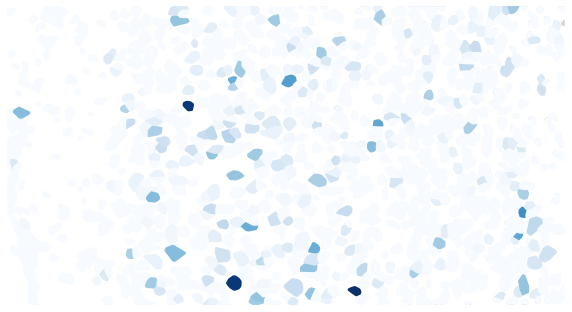

In [94]:
plot_poly_cells_expression(labs, qhulls, counts['Plcxd2'], 'Blues',width=10, height=10,)

In [64]:
all_centroids  = np.vstack([c.mean(0) for c in coords])

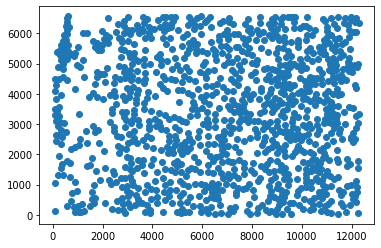

In [90]:
plt.scatter(all_centroids[:,0], all_centroids[:,1])

In [87]:
# HULLS are actual cell type renders from imaging data, centroids are center coordinates for each cell 

array([4486.02889715, 3503.77998111, 1062.67607327, ...,   50.65878182,
       3330.84486203, 1768.33761329])

In [93]:
print(counts.columns)

Index(['Acss1', 'Adcyap1', 'Adgrl2', 'Aqp4', 'Arc', 'Arf5', 'Arhgap24',
       'Arl4d', 'Arx', 'Batf3',
       ...
       'Ucma', 'Vgf', 'Vip', 'Wt1', 'Wfs1', 'Tnnc1', 'Sccpdh', 'Rbp4', 'Etv1',
       'Drd1'],
      dtype='object', name='Gene', length=166)


In [114]:
all_centroids

array([[   68.86374444,  4486.02889715],
       [   63.85229362,  3503.77998111],
       [   92.84375751,  1062.67607327],
       ...,
       [12275.90667096,    50.65878182],
       [12294.80792699,  3330.84486203],
       [12260.9135883 ,  1768.33761329]])

In [ ]:
# with the 3D data 